Sales prediction using machine learning

Import the required libraries into the code

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

load the dataset

In [ ]:
sales=pd.read_csv("Advertising.csv")
sales.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
sales.shape

(200, 5)

In [ ]:
sales.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
sales.isnull().sum()

index        0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
sales.rename(columns={'index':'Sr.No.'},inplace=True)
sales

,Sr.No.,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
sales.describe()

,Sr.No.,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Training a regression model for sales prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

x= sales.drop('Sales', axis=1)
y = sales['Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=40)


ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)
y_pred = ridge_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 3.875709936799302


In [ ]:
#coefficients of ridge regression model
coeff = ridge_model.coef_
print("Coefficients:", coeff)
#intercept of ridge regression model
intercept = ridge_model.intercept_
print("Intercept:", intercept)
#score of ridge regression model
score = ridge_model.score(x_test, y_test)
print("Score:", score)


Coefficients: [-0.00260234  0.04525359  0.1892862  -0.00090458]
Intercept: 3.2987184506698863
Score: 0.8298222050431765


In [ ]:
# Calculate the correlation matrix
corr_matrix = sales.corr()
corr_matrix

,Sr.No.,TV,Radio,Newspaper,Sales
Sr.No.,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


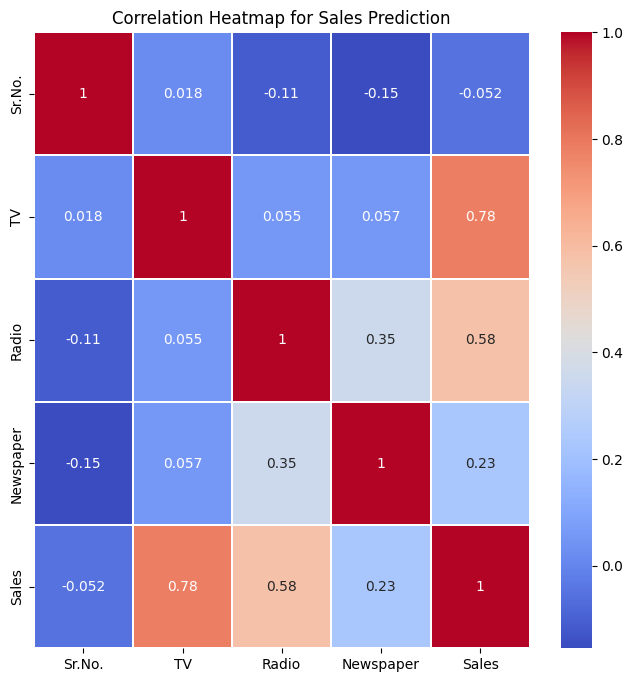

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.2)
plt.title('Correlation Heatmap for Sales Prediction')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[x_train.shape[1]]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for sales prediction
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(x_train, y_train, epochs=100, validation_split=0.2)




Epoch 1/100
5/5 [==============================] - 2s 97ms/step - loss: 852.5118 - val_loss: 105.6665
Epoch 2/100
5/5 [==============================] - 0s 23ms/step - loss: 113.3774 - val_loss: 127.6546
Epoch 3/100
5/5 [==============================] - 0s 53ms/step - loss: 157.8622 - val_loss: 80.3249
Epoch 4/100
5/5 [==============================] - 0s 54ms/step - loss: 60.3851 - val_loss: 14.4181
Epoch 5/100
5/5 [==============================] - 0s 49ms/step - loss: 20.6423 - val_loss: 37.3244
Epoch 6/100
5/5 [==============================] - 0s 39ms/step - loss: 35.1804 - val_loss: 31.9502
Epoch 7/100
5/5 [==============================] - 0s 34ms/step - loss: 21.3791 - val_loss: 9.2964
Epoch 8/100
5/5 [==============================] - 0s 35ms/step - loss: 11.1172 - val_loss: 9.3952
Epoch 9/100
5/5 [==============================] - 0s 35ms/step - loss: 12.7253 - val_loss: 8.5621
Epoch 10/100
5/5 [==============================] - 0s 78ms/step - loss: 9.6955 - val_loss: 6.7029

In [ ]:
# Evaluate the model
y_pred_tflow = model.predict(x_test)
mse_tf = mean_squared_error(y_test, y_pred_tflow)

print("Mean Squared Error (Scikit-learn):", mse)
print("Mean Squared Error (TensorFlow):", mse_tf)

1/1 [==============================] - 0s 38ms/step
Mean Squared Error (Scikit-learn): 3.875709936799302
Mean Squared Error (TensorFlow): 2.0597487590594667


In [ ]:
from sklearn.tree import DecisionTreeRegressor as DTReg
tree_model = DTReg(random_state=42)
tree_model.fit(x_train, y_train)
y_pred_dectree = tree_model.predict(x_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_dectree)
print("Mean Squared Error (Decision Tree):", mse_tree)


Mean Squared Error (Decision Tree): 0.9070000000000006


In [1]:
# prompt: stack column chart

# Sample data (replace with your actual data)
categories = ['Category 1', 'Category 2', 'Category 3']
values1 = [10, 15, 8]
values2 = [5, 12, 10]
values3 = [8, 7, 12]

# Create a stacked column chart
plt.bar(categories, values1, label='Value 1')
plt.bar(categories, values2, bottom=values1, label='Value 2')
plt.bar(categories, values3, bottom=[sum(x) for x in zip(values1, values2)], label='Value 3')

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Stacked Column Chart')
plt.legend()
plt.show()


NameError: name 'plt' is not defined

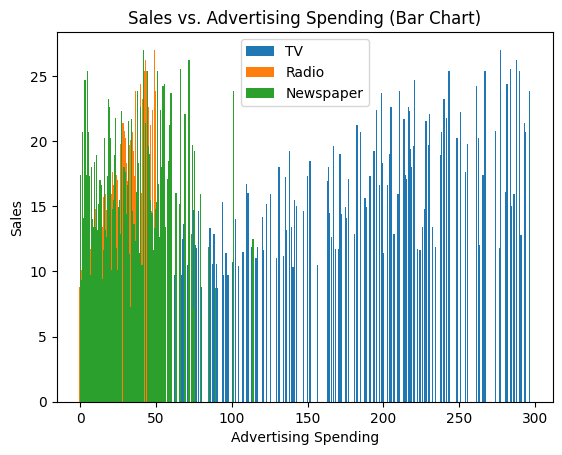

In [ ]:
#bar chart
plt.bar(sales['TV'], sales['Sales'], label='TV')
plt.bar(sales['Radio'], sales['Sales'], label='Radio')
plt.bar(sales['Newspaper'], sales['Sales'], label='Newspaper')
plt
plt.xlabel('Advertising Spending')
plt.ylabel('Sales')
plt.title('Sales vs. Advertising Spending (Bar Chart)')
plt.legend()
plt.show()


In [ ]:
import plotly.express as px

treemap_data = sales[['TV', 'Radio', 'Newspaper', 'Sales']]
treemap_data = treemap_data.melt(id_vars=['Sales'], var_name='Advertising Channel', value_name='Spending')

# Create treemap
fig = px.treemap(treemap_data, path=['Advertising Channel'], values='Spending', color='Sales',
                 color_continuous_scale='Blues', title='Advertising data for sales prediction')
fig.show()


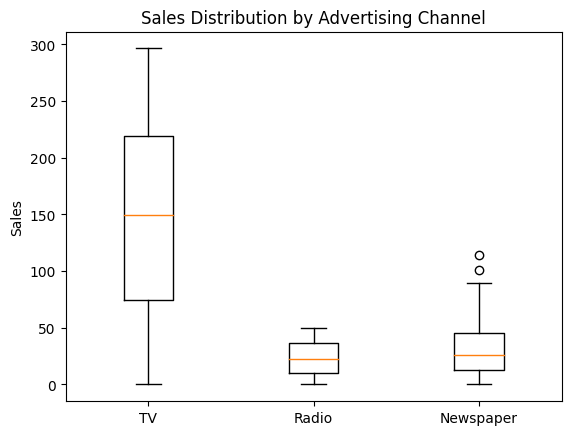

In [ ]:
#box plot
plt.boxplot([sales['TV'], sales['Radio'], sales['Newspaper']])
plt.xticks([1, 2, 3], ['TV', 'Radio', 'Newspaper'])
plt.ylabel('Sales')
plt.title('Sales Distribution by Advertising Channel')
plt.show()
